### Notebook whereby "Volatiltiy" can be added into the market, or a simulation of volatility

In [95]:
# un-comment these lines if you need to install the packages
# !{sys.executable} pip3 install numpy
# !{sys.executable} pip3 install matplotlib

import matplotlib.pyplot as plt
import numpy as np
import csv
import random

from BSE import market_session

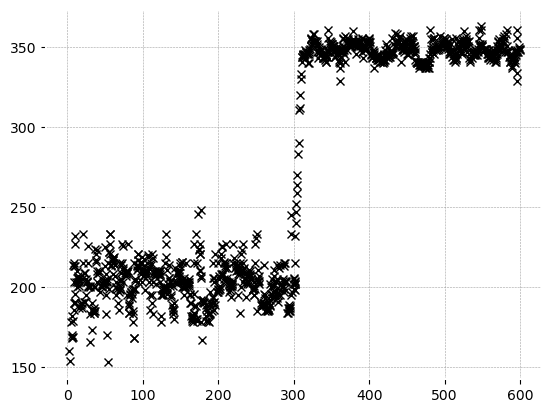

In [96]:
start_time = 0
end_time = 60 * 10

chart1_range=(80, 320)


supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [chart1_range], 'stepmode': 'fixed'}]
demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [chart1_range], 'stepmode': 'fixed'}]

order_interval = 60
order_sched = {'sup': supply_schedule, 'dem': demand_schedule,
               'interval': order_interval, 'timemode': 'periodic'}

sellers_spec = [('ZIP', 11)]
buyers_spec = sellers_spec
traders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}

verbose = False


trial_id = 'smith_chart_1'
dump_flags = {'dump_blotters': True, 'dump_lobs': True, 'dump_strats': True,
              'dump_avgbals': True, 'dump_tape': True}

shocked_range = (300, 400)
shock_time = int(end_time / 2)

supply_schedule = [ {'from':0, 'to':shock_time, 'ranges':[chart1_range], 'stepmode':'fixed'},
              {'from':shock_time, 'to':end_time, 'ranges':[shocked_range], 'stepmode':'fixed'},
            ]
demand_schedule = supply_schedule

sellers_spec = [('ZIP', 10), ('ZIC', 10), ('SHVR', 10), ('GVWY', 10)]
buyers_spec = sellers_spec
traders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}

order_interval = 10
order_sched = {'sup': supply_schedule, 'dem': demand_schedule,
               'interval': order_interval, 'timemode': 'drip-poisson'}

n_sessions = 1

x = np.empty(0)
y = np.empty(0)

for sess in range(n_sessions):
    trial_id = 'smith_chart_' + str(sess)

    market_session(trial_id, start_time, end_time, traders_spec, order_sched, dump_flags, verbose)

    prices_fname = trial_id + '_tape.csv'
    with open(prices_fname, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time = float(row[1])
            price = float(row[2])
            x = np.append(x,time)
            y = np.append(y,price)

plt.plot(x, y, 'x', color='black');

In [97]:
import math
def schedule_offsetfn(t):
        pi2 = math.pi * 2
        c = math.pi * 3000
        wavelength = t / c
        gradient = 100 * t / (c / pi2)
        amplitude = 100 * t / (c / pi2)
        offset = gradient + amplitude * math.sin(wavelength * t)
        return int(round(offset, 0))

duration = end_time - start_time

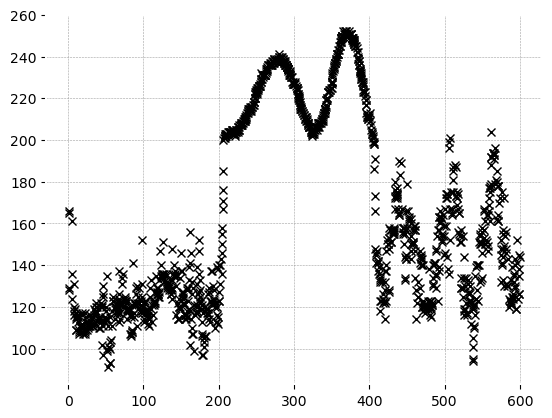

In [98]:
start_time = 0
end_time = 60 * 10

chart1_range=(80, 320)


range1 = (30, 190, schedule_offsetfn)
range2 = (200, 210, schedule_offsetfn)

supply_schedule = [ {'from':start_time, 'to':duration/3, 'ranges':[range1], 'stepmode':'fixed'},
                    {'from':duration/3, 'to':2*duration/3, 'ranges':[range2], 'stepmode':'fixed'},
                    {'from':2*duration/3, 'to':end_time, 'ranges':[range1], 'stepmode':'fixed'}
                   ]

demand_schedule = [ {'from':start_time, 'to':duration/3, 'ranges':[range1], 'stepmode':'fixed'},
                    {'from':duration/3, 'to':2*duration/3, 'ranges':[range2], 'stepmode':'fixed'},
                    {'from':2*duration/3, 'to':end_time, 'ranges':[range1], 'stepmode':'fixed'}
                   ]

#demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [chart1_range], 'stepmode': 'fixed'}]

order_interval = 60
order_sched = {'sup': supply_schedule, 'dem': demand_schedule,
               'interval': order_interval, 'timemode': 'periodic'}

sellers_spec = [('ZIP', 11)]
buyers_spec = sellers_spec
traders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}

verbose = False


trial_id = 'smith_chart_1'
dump_flags = {'dump_blotters': True, 'dump_lobs': True, 'dump_strats': True,
              'dump_avgbals': True, 'dump_tape': True}


sellers_spec = [('ZIP', 10), ('ZIC', 10), ('SHVR', 10), ('GVWY', 10)]
buyers_spec = sellers_spec
traders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}

order_interval = 10
order_sched = {'sup': supply_schedule, 'dem': demand_schedule,
               'interval': order_interval, 'timemode': 'drip-poisson'}

n_sessions = 1

x = np.empty(0)
y = np.empty(0)

for sess in range(n_sessions):
    trial_id = 'smith_chart_' + str(sess)

    market_session(trial_id, start_time, end_time, traders_spec, order_sched, dump_flags, verbose)

    prices_fname = trial_id + '_tape.csv'
    with open(prices_fname, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time = float(row[1])
            price = float(row[2])
            x = np.append(x,time)
            y = np.append(y,price)

plt.plot(x, y, 'x', color='black');

# Adding in volatiltiy levels to the plot 

In [99]:
def create_volatile_schedule(base_range, volatility_factor, start_time, end_time):
    schedule = []
    current_time = start_time
    while current_time < end_time:
        range_min = base_range[0] + random.randint(-volatility_factor, volatility_factor)
        range_max = base_range[1] + random.randint(-volatility_factor, volatility_factor)
        current_range = (max(bse_sys_minprice, range_min), min(bse_sys_maxprice, range_max))
        next_time = current_time + random.randint(10, 50)  # Random time increment between 10 to 50 units
        schedule.append({'from': current_time, 'to': next_time, 'ranges': [current_range], 'stepmode': 'fixed'})
        current_time = next_time
    return schedule


The functions creates price ranges that changes over time and introduces a volaitlity level based on the factor stated. The function works by adding random fluctuation for min and max values. It creates a current price range that is slightly shifted. The range is bound to the min and max limits to make sure it always stays within those levels. 

A random next time is chosen for the next volatility. The information is contained within a dictionary for each range of volatility. 

In [100]:
# a bunch of system constants (globals)
bse_sys_minprice = 1                    # minimum price in the system, in cents/pennies
bse_sys_maxprice = 500                  # maximum price in the system, in cents/pennies


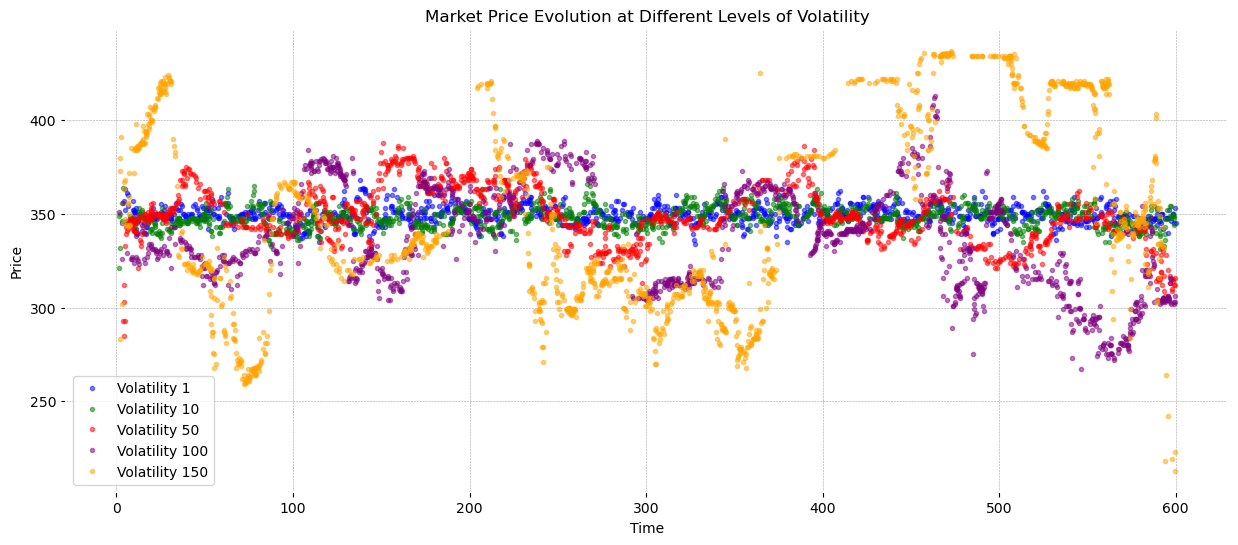

In [101]:
# Plotting multiple volatility levels
volatility_levels = [1, 10, 50,100,150]  # Different levels of volatility
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink']

plt.figure(figsize=(15, 6))

for volatility_factor, color in zip(volatility_levels, colors):
    # Use the function to create schedules
    supply_schedule = create_volatile_schedule((300, 400), volatility_factor, 0, 1000)
    demand_schedule = create_volatile_schedule((300, 400), volatility_factor, 0, 1000)

    sellers_spec = [('ZIP', 10), ('ZIC', 10), ('SHVR', 10), ('GVWY', 10)]
    buyers_spec = sellers_spec
    traders_spec = {'sellers': sellers_spec, 'buyers': buyers_spec}

    order_interval = 10
    order_sched = {'sup': supply_schedule, 'dem': demand_schedule,
                   'interval': order_interval, 'timemode': 'drip-poisson'}

    n_sessions = 1

    x = np.empty(0)
    y = np.empty(0)

    for sess in range(n_sessions):
        trial_id = f'smith_chart_vol_{volatility_factor}_' + str(sess)

        market_session(trial_id, start_time, end_time, traders_spec, order_sched, dump_flags, verbose=False)

        prices_fname = trial_id + '_tape.csv'
        with open(prices_fname, newline='') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
                time = float(row[1])
                price = float(row[2])
                x = np.append(x, time)
                y = np.append(y, price)

    plt.plot(x, y, '.', color=color, alpha=0.5, label=f'Volatility {volatility_factor}', linestyle = 'none')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Market Price Evolution at Different Levels of Volatility')
plt.legend()
plt.show()


# Now to plot traders avg balance against volatility (TEST)

In [102]:
file_path = 'smith_chart_vol_200_0_avg_balance.csv'

# Load the CSV file, using header=None as the file may not have a defined header row
df = pd.read_csv(file_path, header=None)

In [103]:
trader_balance_totals = {}
trader_balance_counts = {}

  Trader   Avg_Balance
0   GVWY  27589.157588
1   SHVR  26768.739300
2    ZIC  26953.121920
3    ZIP  23999.320363


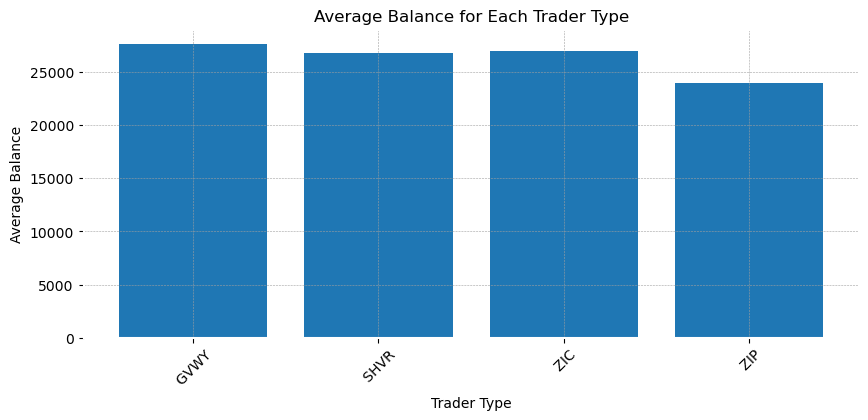

In [104]:
for col in range(5, df.shape[1], 4):
    trader_col = col -1
    balance_col = col 
    
    # Extract trader names and balances
    trader_names = df[trader_col]
    balances = df[balance_col]
    
    # Aggregate balances for each trader
    for trader, balance in zip(trader_names, balances):
        if trader in trader_balance_totals:
            trader_balance_totals[trader] += balance
            trader_balance_counts[trader] += 1
        else:
            trader_balance_totals[trader] = balance
            trader_balance_counts[trader] = 1

# Calculate average balances for each trader
avg_balances = {trader: trader_balance_totals[trader] / trader_balance_counts[trader]
                for trader in trader_balance_totals}

# Convert to DataFrame for easier plotting
avg_balance_df = pd.DataFrame(list(avg_balances.items()), columns=['Trader', 'Avg_Balance'])

print(avg_balance_df)

# Plotting the average balances
plt.figure(figsize=(10, 4))
plt.bar(avg_balance_df['Trader'], avg_balance_df['Avg_Balance'])
plt.xlabel('Trader Type')
plt.ylabel('Average Balance')
plt.title('Average Balance for Each Trader Type')
plt.xticks(rotation=45)
plt.show()

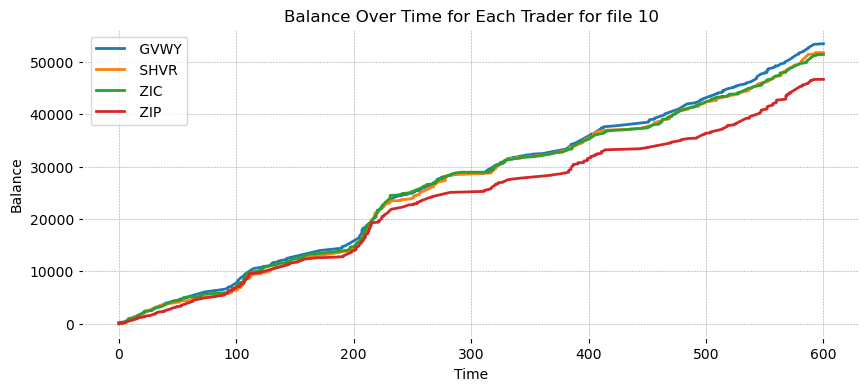

In [105]:
# Load the CSV file, assuming it does not have headers
df = pd.read_csv(file_path, header=None)

# Extract the time column (assuming time is in column 1)
time = df[1]

# Initialize a dictionary to store time series data for each trader
trader_time_series = {}

# Start reading trader data from column 5 (name) and column 6 (balance), incrementing by 4 for each trader
for col in range(5, df.shape[1], 4):
    trader_name_col = col -1
    balance_col = col 
    
    # Get trader name from the first row for this column
    trader_name = df.iloc[0, trader_name_col]
    
    # Get the balance column for this trader over time
    balances = df[balance_col]
    
    # Store in dictionary
    trader_time_series[trader_name] = balances

# Plotting the time series for each trader
plt.figure(figsize=(10, 4))
for trader_name, balances in trader_time_series.items():
    plt.plot(time, balances, label=trader_name)

# Labeling the plot
plt.xlabel('Time')
plt.ylabel('Balance')
plt.title('Balance Over Time for Each Trader for file 10')
plt.legend()
plt.show()


# Now for the actual plotting

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize a dictionary to store the time series data for each trader across all volatility levels
trader_time_series_by_volatility = {}

# Loop over each volatility level to load data and organize it
for volatility in volatility_levels:
    # Construct the filename based on the current volatility level
    file_path = f'smith_chart_vol_{volatility}_0_avg_balance.csv'
    
    # Load the CSV file, assuming it does not have headers
    try:
        df = pd.read_csv(file_path, header=None)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        continue
    
    # Extract the time column (assuming time is in column 1)
    time = df[1]
    
    # Loop through each trader's data (starting from column 5, with trader name and balance in alternating columns)
    for col in range(5, df.shape[1], 4):
        trader_name_col = col - 1  # Adjusted to be col - 1 for the trader name
        balance_col = col          # Balance column for the trader

        # Get trader name from the first row for this column
        trader_name = df.iloc[0, trader_name_col]
        
        # Get the balance column for this trader over time
        balances = df[balance_col]
        #print(balances)
        
        # Initialize the nested dictionary for each trader and volatility if not already present
        if trader_name not in trader_time_series_by_volatility:
            trader_time_series_by_volatility[trader_name] = {}
        
        # Store the time and balance data for each trader at each volatility level
        trader_time_series_by_volatility[trader_name][volatility] = (time, balances)

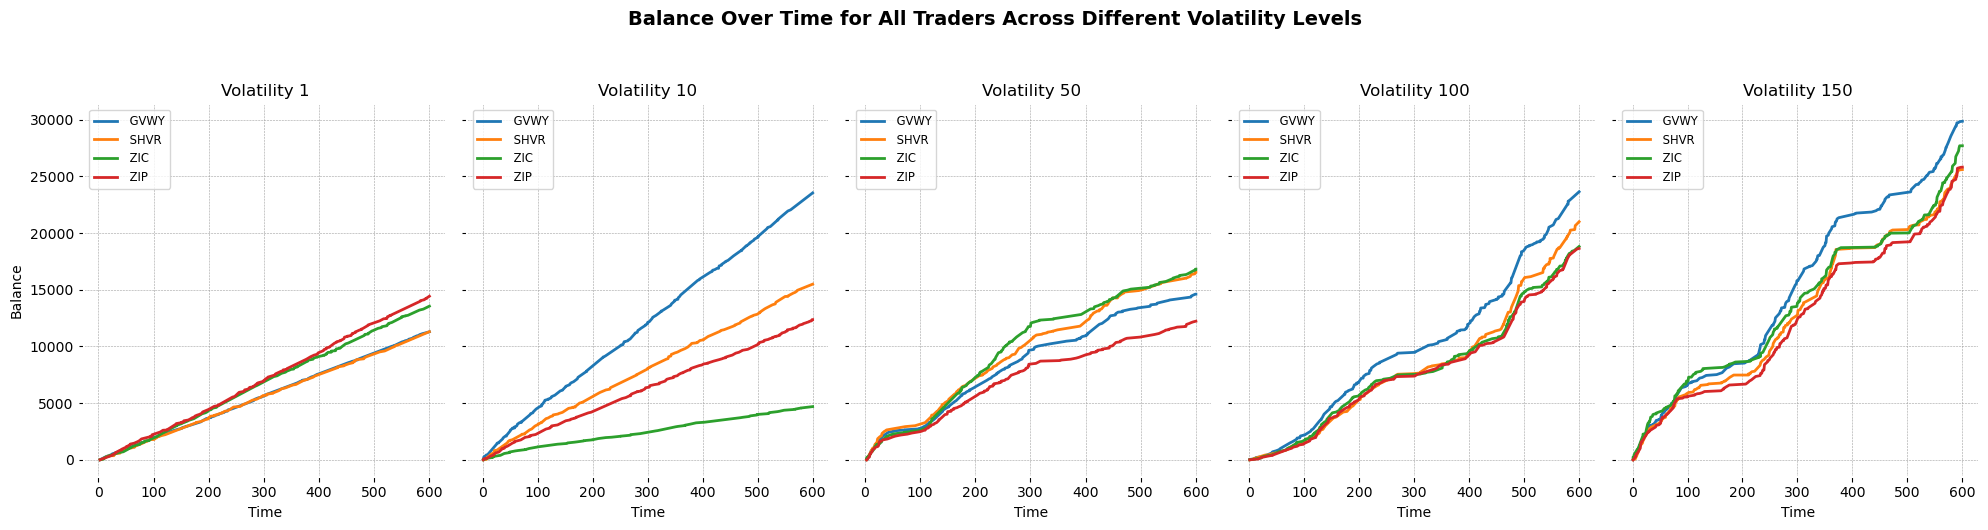

In [107]:
# Set up the subplots grid
num_volatility_levels = len(volatility_levels)
fig, axs = plt.subplots(1, num_volatility_levels, figsize=(20, 5), sharey=True)  # 1 row, n columns, sharing y-axis

# Plot each volatility level in a separate subplot
for i, volatility in enumerate(volatility_levels):
    ax = axs[i]  # Select the subplot for this volatility level
    for trader_name, volatility_data in trader_time_series_by_volatility.items():
        # Check if the current volatility level exists for this trader
        if volatility in volatility_data:
            time, balances = volatility_data[volatility]
            ax.plot(time, balances, label=f'{trader_name}')
    
    # Labeling and legend for each subplot
    ax.set_xlabel('Time')
    ax.set_title(f'Volatility {volatility}')
    if i == 0:
        ax.set_ylabel('Balance')
    ax.legend(loc='upper left', fontsize='small')
    ax.grid(True)

# Adjust layout for readability
plt.suptitle('Balance Over Time for All Traders Across Different Volatility Levels', y=1.05, fontsize=14)
plt.tight_layout()
plt.show()

# Plotting price change each day 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


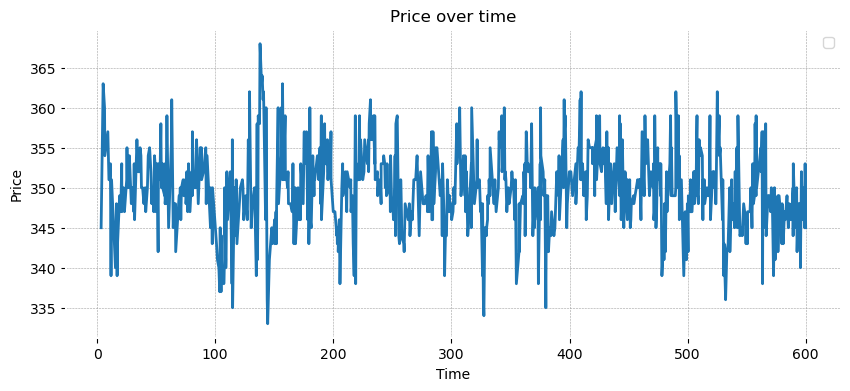

In [108]:
file_path = 'smith_chart_vol_1_0_tape.csv'

# Load the CSV file, using header=None as the file may not have a defined header row
df = pd.read_csv(file_path, header=None)

# Extract the time column (assuming time is in column 1)
time = df[1]
price = df[2]

plt.figure(figsize=(10, 4))
plt.plot(time, price)

# Labeling the plot
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Price over time')
plt.legend()
plt.show()

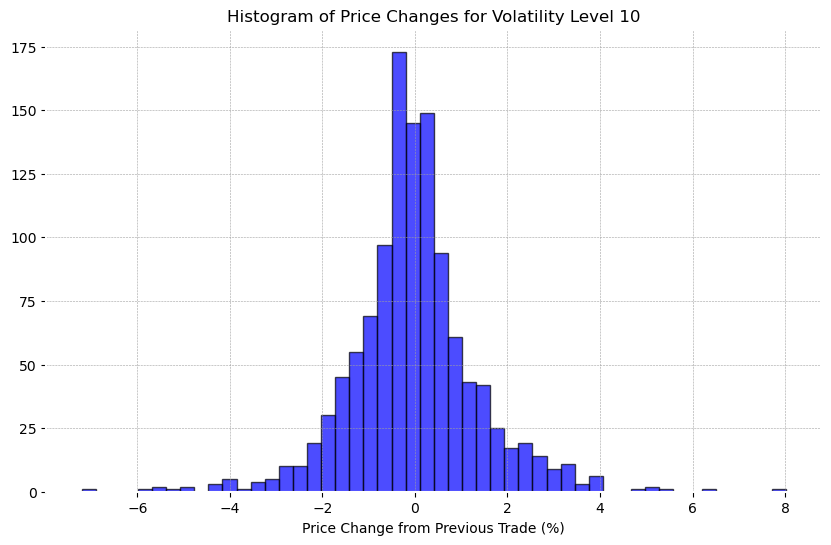

In [109]:
# Plotting price change from previous trade for a specific CSV file as a histogram
file_path = 'smith_chart_vol_10_0_tape.csv'

# Load the CSV file, using header=None as the file may not have a defined header row
df = pd.read_csv(file_path, header=None)

# Extract the price column (assuming price is in column 2)
price = df[2]

# Calculate price change from the previous trade
price_change = (price.diff().fillna(0)/price)*100

# Plot the price change as a histogram
plt.figure(figsize=(10, 6))
plt.hist(price_change, bins=50, color='blue', alpha=0.7, edgecolor='black')

# Labeling the histogram
plt.xlabel('Price Change from Previous Trade (%)')
plt.title('Histogram of Price Changes for Volatility Level 10')
plt.grid(axis='y', linestyle='--')
plt.show()
